# **Identification of Crime Prone Areas**

**Group ID:** 16

**Group Guides:**

Dr.Irfan Siddavatam



**Group Members:**

1814002 - Dhruv Doshi

1814006 - Shubham Bhakuni

1814015 - Labdhi Jain

1814021 - Kunj Gala


**Dataset to be used:** NYPD Dataset (5 Million plus rows, 19 columns)

**Objectives for demonstration:**


1. Data Preprocessing


*   Data Cleaning
*   Data Reduction
*   Data Integration
*   Data Conversion
*   Data Sampling
*   Creating Dummy Variables (one-Hot Encoding)

2. Data Visualization


In [ ]:
import pandas as pd
!pip install -U -q PyDrive
from pydrive.auth import GoogleAuth
from pydrive.drive import GoogleDrive
from google.colab import auth
from oauth2client.client import GoogleCredentials
auth.authenticate_user()
gauth = GoogleAuth()
gauth.credentials = GoogleCredentials.get_application_default()
drive = GoogleDrive(gauth)
link = 'https://drive.google.com/file/d/1xBh3YytbtrOEo2bqMmqe_XncHWtY6aqI/view?usp=sharing'

id = link.split("/")[-2]

downloaded = drive.CreateFile({'id':id})
downloaded.GetContentFile('df_after_preprocessing2.csv')

df = pd.read_csv('df_after_preprocessing2.csv')

In [ ]:
df.columns

Index(['Unnamed: 0', 'CAD_EVNT_ID', 'NYPD_PCT_CD', 'RADIO_CODE', 'ADD_TS',
       'DISP_TS', 'ARRIVD_TS', 'CLOSNG_TS', 'Latitude', 'Longitude',
       'INCIDENT_DATE_TIME', 'PATRL_BORO_NM_PATROL BORO BKLYN NORTH',
       'PATRL_BORO_NM_PATROL BORO BKLYN SOUTH',
       'PATRL_BORO_NM_PATROL BORO BRONX',
       'PATRL_BORO_NM_PATROL BORO MAN NORTH',
       'PATRL_BORO_NM_PATROL BORO MAN SOUTH',
       'PATRL_BORO_NM_PATROL BORO QUEENS NORTH',
       'PATRL_BORO_NM_PATROL BORO QUEENS SOUTH',
       'PATRL_BORO_NM_PATROL BORO STATEN ISLAND', 'CIP_JOBS_Critical',
       'CIP_JOBS_Non CIP', 'CIP_JOBS_Non Critical', 'CIP_JOBS_Serious'],
      dtype='object')

In [ ]:
df.drop('Unnamed: 0', axis=1, inplace=True)

In [ ]:
df.head()

,CAD_EVNT_ID,NYPD_PCT_CD,RADIO_CODE,ADD_TS,DISP_TS,ARRIVD_TS,CLOSNG_TS,Latitude,Longitude,INCIDENT_DATE_TIME,...,PATRL_BORO_NM_PATROL BORO BRONX,PATRL_BORO_NM_PATROL BORO MAN NORTH,PATRL_BORO_NM_PATROL BORO MAN SOUTH,PATRL_BORO_NM_PATROL BORO QUEENS NORTH,PATRL_BORO_NM_PATROL BORO QUEENS SOUTH,PATRL_BORO_NM_PATROL BORO STATEN ISLAND,CIP_JOBS_Critical,CIP_JOBS_Non CIP,CIP_JOBS_Non Critical,CIP_JOBS_Serious
0,75781251,105.0,29Q1,2021-03-24 19:49:06,2021-03-24 19:51:44,2021-03-24 20:10:33,2021-03-24 20:18:17,40.665504,-73.755437,2021-03-24 19:49:06,...,0,0,0,0,1,0,0,0,1,0
1,79375430,63.0,53D,2021-08-26 12:25:57,2021-08-26 12:31:54,2021-08-26 12:39:22,2021-08-26 12:45:07,40.625626,-73.915499,2021-08-26 12:25:56,...,0,0,0,0,0,0,0,1,0,0
2,77407811,23.0,24Q2,2021-06-04 16:24:23,2021-06-04 16:25:04,2021-06-04 16:28:27,2021-06-04 16:48:01,40.788134,-73.945602,2021-06-04 16:24:23,...,0,1,0,0,0,0,0,0,0,1
3,76177095,106.0,29H1,2021-04-11 17:19:50,2021-04-11 17:20:36,2021-04-11 17:25:07,2021-04-11 17:43:47,40.677098,-73.825040,2021-04-11 17:19:50,...,0,0,0,0,1,0,0,0,1,0
4,79879502,104.0,24Q2,2021-09-17 00:33:16,2021-09-17 00:42:37,2021-09-17 01:22:38,2021-09-17 02:02:09,40.707385,-73.873772,2021-09-17 00:33:16,...,0,0,0,1,0,0,0,1,0,0


In [ ]:
df['RADIO_CODE'].value_counts()

53D     133888
20R      81576
22Q2     67598
50G2     67359
29H1     59547
24Q2     41111
29Q1     33510
39T1      7762
10S2      7743
33         361
Name: RADIO_CODE, dtype: int64

In [ ]:
df['RADIO_CODE'].value_counts()

53D     133888
20R      81576
22Q2     67598
50G2     67359
29H1     59547
24Q2     41111
29Q1     33510
39T1      7762
10S2      7743
33         361
Name: RADIO_CODE, dtype: int64

In [ ]:
df.shape

(500455, 22)

In [ ]:
#dropping unnecessary columns
df.drop(['NYPD_PCT_CD','ADD_TS',	'DISP_TS','CLOSNG_TS','CIP_JOBS_Critical','CIP_JOBS_Non CIP','CIP_JOBS_Non Critical','CIP_JOBS_Serious'],axis=1,inplace=True)

In [ ]:
df.head()

,CAD_EVNT_ID,RADIO_CODE,ARRIVD_TS,Latitude,Longitude,INCIDENT_DATE_TIME,PATRL_BORO_NM_PATROL BORO BKLYN NORTH,PATRL_BORO_NM_PATROL BORO BKLYN SOUTH,PATRL_BORO_NM_PATROL BORO BRONX,PATRL_BORO_NM_PATROL BORO MAN NORTH,PATRL_BORO_NM_PATROL BORO MAN SOUTH,PATRL_BORO_NM_PATROL BORO QUEENS NORTH,PATRL_BORO_NM_PATROL BORO QUEENS SOUTH,PATRL_BORO_NM_PATROL BORO STATEN ISLAND
0,75781251,29Q1,2021-03-24 20:10:33,40.665504,-73.755437,2021-03-24 19:49:06,0,0,0,0,0,0,1,0
1,79375430,53D,2021-08-26 12:39:22,40.625626,-73.915499,2021-08-26 12:25:56,0,1,0,0,0,0,0,0
2,77407811,24Q2,2021-06-04 16:28:27,40.788134,-73.945602,2021-06-04 16:24:23,0,0,0,1,0,0,0,0
3,76177095,29H1,2021-04-11 17:25:07,40.677098,-73.825040,2021-04-11 17:19:50,0,0,0,0,0,0,1,0
4,79879502,24Q2,2021-09-17 01:22:38,40.707385,-73.873772,2021-09-17 00:33:16,0,0,0,0,0,1,0,0


In [ ]:
df.shape

(500455, 14)

# K-Means Clustering

In [ ]:
# importing libraries
import numpy as nm
import matplotlib.pyplot as mtp

In [ ]:
#x=df.drop('CAD_EVNT_ID',axis=1)
x=df[['Longitude','Latitude']]
x.to_csv('k_means_csv.csv')

In [ ]:
x =x.values

In [ ]:
print(x)

[[-73.755437  40.665504]
 [-73.915499  40.625626]
 [-73.945602  40.788134]
 ...
 [-73.998248  40.745631]
 [-73.858619  40.8235  ]
 [-73.938133  40.82037 ]]


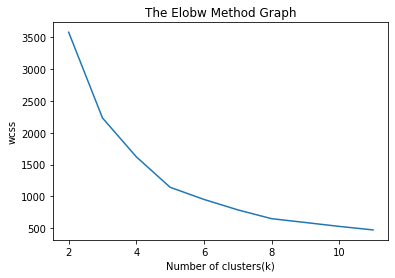

In [ ]:
#finding optimal number of clusters using the elbow method
from sklearn.cluster import KMeans
wcss_list= []  #Initializing the list for the values of WCSS

#Using for loop for iterations from 1 to 10.
for i in range(2, 12):
    kmeans = KMeans(n_clusters=i, init='k-means++', random_state= 42)
    kmeans.fit(x)
    wcss_list.append(kmeans.inertia_)
mtp.plot(range(2, 12), wcss_list)
mtp.title('The Elobw Method Graph')
mtp.xlabel('Number of clusters(k)')
mtp.ylabel('wcss')
mtp.show()

In [ ]:
#training the K-means model on a dataset
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=10, init='k-means++', random_state= 42)
y_predict= kmeans.fit_predict(x)

In [ ]:
y_predict

array([1, 8, 7, ..., 0, 2, 7], dtype=int32)

In [ ]:
#delete later

In [ ]:
pd.DataFrame(y_predict).to_csv('y_predict_latest.csv')

In [ ]:
import numpy as np
Y_predict=list(np.array(pd.read_csv('y_predict_latest.csv')['0']))

In [ ]:
x=pd.read_csv('k_means_csv.csv')

In [ ]:
x.drop('Unnamed: 0',axis=1,inplace=True)

In [ ]:
x=x.values

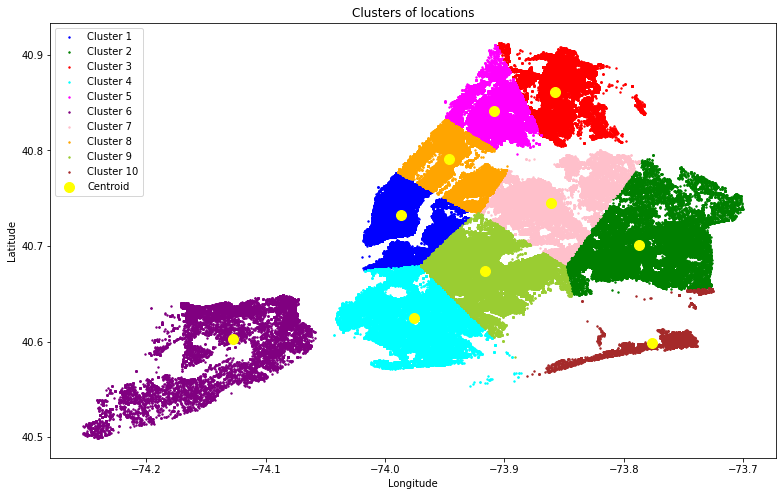

In [ ]:
#visulaizing the clusters
mtp.figure(figsize=(13,8))
mtp.scatter(x[y_predict == 0, 0], x[y_predict == 0, 1], s = 2, c = 'blue', label = 'Cluster 1') #for first cluster
mtp.scatter(x[y_predict == 1, 0], x[y_predict == 1, 1], s = 2, c = 'green', label = 'Cluster 2') #for second cluster
mtp.scatter(x[y_predict== 2, 0], x[y_predict == 2, 1], s = 2, c = 'red', label = 'Cluster 3') #for third cluster
mtp.scatter(x[y_predict == 3, 0], x[y_predict == 3, 1], s = 2, c = 'cyan', label = 'Cluster 4') #for fourth cluster
mtp.scatter(x[y_predict == 4, 0], x[y_predict == 4, 1], s = 2, c = 'magenta', label = 'Cluster 5') #for fifth cluster
mtp.scatter(x[y_predict == 5, 0], x[y_predict == 5, 1], s = 2, c = 'purple', label = 'Cluster 6') #for sixth cluster
mtp.scatter(x[y_predict == 6, 0], x[y_predict == 6, 1], s = 2, c = 'pink', label = 'Cluster 7') #for seventh cluster
mtp.scatter(x[y_predict == 7, 0], x[y_predict == 7, 1], s = 2, c = 'orange', label = 'Cluster 8') #for Eight cluster
mtp.scatter(x[y_predict == 8, 0], x[y_predict == 8, 1], s = 2, c = 'yellowgreen', label = 'Cluster 9') #for ninth cluster
mtp.scatter(x[y_predict == 9, 0], x[y_predict == 9, 1], s = 2, c = 'brown', label = 'Cluster 10') #for tenth cluster
# mtp.scatter(x[y_predict == 10, 0], x[y_predict == 10, 1], s = 2, c = 'gray', label = 'Cluster 11') #for eleventh cluster
mtp.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s = 100, c = 'yellow', label = 'Centroid')
mtp.title('Clusters of locations')
mtp.xlabel('Longitude')
mtp.ylabel('Latitude')
mtp.legend()
mtp.show()

In [ ]:
pd.DataFrame(y_predict).to_csv('y_predict.csv')
np.array(pd.read_csv('y_predict.csv')['0'])

In [ ]:
pd.DataFrame(kmeans.cluster_centers_[:, 0]).to_csv('kmeans.cluster_centers_0')

In [ ]:
import numpy as np
kmeans.cluster_centers_0=np.array(pd.read_csv('kmeans.cluster_centers_0')['0'])

In [ ]:
pd.DataFrame(kmeans.cluster_centers_[:, 1]).to_csv('kmeans.cluster_centers_1')

In [ ]:
kmeans.cluster_centers_1=np.array(pd.read_csv('kmeans.cluster_centers_1')['0'])

In [ ]:
kmeans.cluster_centers_1[0]

40.73209737124884

In [ ]:
kmeans.cluster_centers_0[0]

-73.98649133881594

In [ ]:
from geopy.geocoders import Nominatim
geolocator = Nominatim(user_agent="geoapiExercises")
for i in range(0,10):
  location = geolocator.reverse(str(kmeans.cluster_centers_1[i]) + "," + str(kmeans.cluster_centers_0[i]))
  print(iz)

In [ ]:
from geopy.geocoders import Nominatim
geolocator = Nominatim(user_agent="GetLoc")
geolocator.reverse(str(kmeans.cluster_centers_1[9]) + "," + str(kmeans.cluster_centers_0[9]))

Location(44-14, Norton Avenue, Queens, Queens County, New York, 11691, United States, (40.5990936, -73.77668622827889, 0.0))

In [ ]:
location

Location(228, East 13th Street, Greenwich Village, Manhattan Community Board 3, New York County, New York, 10009, United States, (40.731933850000004, -73.9866416945338, 0.0))

In [ ]:
#delete later

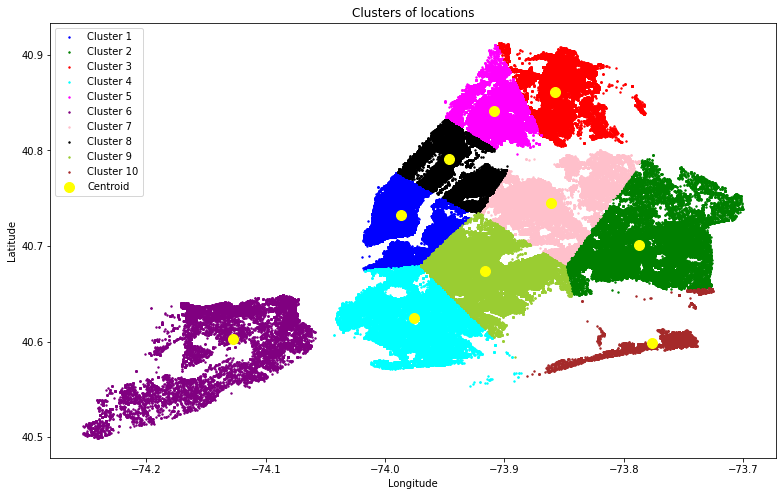

In [ ]:
#visulaizing the clusters
mtp.figure(figsize=(13,8))
mtp.scatter(x[y_predict == 0, 0], x[y_predict == 0, 1], s = 2, c = 'blue', label = 'Cluster 1') #for first cluster
mtp.scatter(x[y_predict == 1, 0], x[y_predict == 1, 1], s = 2, c = 'green', label = 'Cluster 2') #for second cluster
mtp.scatter(x[y_predict== 2, 0], x[y_predict == 2, 1], s = 2, c = 'red', label = 'Cluster 3') #for third cluster
mtp.scatter(x[y_predict == 3, 0], x[y_predict == 3, 1], s = 2, c = 'cyan', label = 'Cluster 4') #for fourth cluster
mtp.scatter(x[y_predict == 4, 0], x[y_predict == 4, 1], s = 2, c = 'magenta', label = 'Cluster 5') #for fifth cluster
mtp.scatter(x[y_predict == 5, 0], x[y_predict == 5, 1], s = 2, c = 'purple', label = 'Cluster 6') #for sixth cluster
mtp.scatter(x[y_predict == 6, 0], x[y_predict == 6, 1], s = 2, c = 'pink', label = 'Cluster 7') #for seventh cluster
mtp.scatter(x[y_predict == 7, 0], x[y_predict == 7, 1], s = 2, c = 'black', label = 'Cluster 8') #for Eight cluster
mtp.scatter(x[y_predict == 8, 0], x[y_predict == 8, 1], s = 2, c = 'yellowgreen', label = 'Cluster 9') #for ninth cluster
mtp.scatter(x[y_predict == 9, 0], x[y_predict == 9, 1], s = 2, c = 'brown', label = 'Cluster 10') #for tenth cluster
# mtp.scatter(x[y_predict == 10, 0], x[y_predict == 10, 1], s = 2, c = 'gray', label = 'Cluster 11') #for eleventh cluster
mtp.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s = 100, c = 'yellow', label = 'Centroid')
mtp.title('Clusters of locations')
mtp.xlabel('Longitude')
mtp.ylabel('Latitude')
mtp.legend()
mtp.show()

In [ ]:
# mtp.figure(figsize=(13,8))
# mtp.scatter(x[y_predict == 0, 0], x[y_predict == 0, 1], s = 2, c = 'blue', label = 'Cluster 1') #for first cluster
# mtp.title('Clusters of locations')
# mtp.xlabel('Latitude')
# mtp.ylabel('Longitude')
# mtp.legend()
# mtp.show()

In [ ]:
#DB Index
from sklearn.metrics import davies_bouldin_score
print(davies_bouldin_score(x, kmeans.labels_))

In [ ]:
#DB Index
from sklearn.metrics import davies_bouldin_score
print(davies_bouldin_score(x, y_predict))

0.772754688644497


In [ ]:
#silhouette score - not working
# from sklearn.metrics import silhouette_score
# silhouette_score(x, kmeans.labels_)

In [ ]:
# pip install git+https://github.com/jqmviegas/jqm_cvi.git

In [ ]:
# #dunn index - import issues
# from jqmcvi import base
# pred = pd.DataFrame(y_predict)
# pred.columns = ['Type']

# # we merge this dataframe with df
# prediction = pd.concat([x, pred], axis = 1)

# # We store the clusters
# clus0 = prediction.loc[prediction.Species == 0]
# clus1 = prediction.loc[prediction.Species == 1]
# clus2 = prediction.loc[prediction.Species == 2]
# clus3 = prediction.loc[prediction.Species == 3]
# clus4 = prediction.loc[prediction.Species == 4]
# cluster_list = [clus0.values, clus1.values, clus2.values, clus3.values, clus4.values]

# print(base.dunn(cluster_list))

In [ ]:
from sklearn.metrics import calinski_harabasz_score
calinski_harabasz_score(x, kmeans.labels_)
#The higher the Index, the better the performance.
#https://towardsdatascience.com/performance-metrics-in-machine-learning-part-3-clustering-d69550662dc6

In [ ]:
x.shape

(500455, 2)

In [ ]:
x

array([[-73.755437,  40.665504],
       [-73.915499,  40.625626],
       [-73.945602,  40.788134],
       ...,
       [-73.998248,  40.745631],
       [-73.858619,  40.8235  ],
       [-73.938133,  40.82037 ]])

In [ ]:
merged = pd.DataFrame(x,columns=['Latitude','Longitude'])
merged['CAD_EVNT_ID']=df['CAD_EVNT_ID']
df_prepro = df
merged["Labels"] = list(kmeans.labels_)
merged = merged.drop(columns=['Latitude','Longitude'],axis=1)
merged=pd.merge(df_prepro,merged,how='inner',on='CAD_EVNT_ID')
merged

NameError: ignored

In [ ]:
merged

In [ ]:
x=pd.DataFrame(x,columns=['Latitude','Longitude'])
x['CAD_EVNT_ID']=df['CAD_EVNT_ID']

In [ ]:
x

In [ ]:
df

In [ ]:
df_prepro = df
x["Labels"] = list(kmeans.labels_)
x_drop = x.drop(columns=['Latitude','Longitude'],axis=1)
x_merged = pd.merge(df_prepro,x_drop,how='inner',on='CAD_EVNT_ID')
x_merged

,CAD_EVNT_ID,RADIO_CODE,ARRIVD_TS,Latitude,Longitude,INCIDENT_DATE_TIME,PATRL_BORO_NM_PATROL BORO BKLYN NORTH,PATRL_BORO_NM_PATROL BORO BKLYN SOUTH,PATRL_BORO_NM_PATROL BORO BRONX,PATRL_BORO_NM_PATROL BORO MAN NORTH,PATRL_BORO_NM_PATROL BORO MAN SOUTH,PATRL_BORO_NM_PATROL BORO QUEENS NORTH,PATRL_BORO_NM_PATROL BORO QUEENS SOUTH,PATRL_BORO_NM_PATROL BORO STATEN ISLAND,Labels
0,75781251,29Q1,2021-03-24 20:10:33,40.665504,-73.755437,2021-03-24 19:49:06,0,0,0,0,0,0,1,0,1
1,79375430,53D,2021-08-26 12:39:22,40.625626,-73.915499,2021-08-26 12:25:56,0,1,0,0,0,0,0,0,8
2,77407811,24Q2,2021-06-04 16:28:27,40.788134,-73.945602,2021-06-04 16:24:23,0,0,0,1,0,0,0,0,7
3,76177095,29H1,2021-04-11 17:25:07,40.677098,-73.825040,2021-04-11 17:19:50,0,0,0,0,0,0,1,0,1
4,79879502,24Q2,2021-09-17 01:22:38,40.707385,-73.873772,2021-09-17 00:33:16,0,0,0,0,0,1,0,0,6
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
500450,79014233,24Q2,2021-08-10 19:37:19,40.694553,-73.898867,2021-08-10 19:21:35,0,0,0,0,0,1,0,0,8
500451,79499944,53D,2021-08-31 23:02:14,40.745196,-73.927784,2021-08-31 21:34:16,0,0,0,0,0,1,0,0,7
500452,77725606,22Q2,2021-06-17 12:36:03,40.745631,-73.998248,2021-06-17 12:08:21,0,0,0,0,1,0,0,0,0
500453,77969063,22Q2,2021-06-27 12:10:14,40.823500,-73.858619,2021-06-27 12:04:29,0,0,1,0,0,0,0,0,2


In [ ]:
x_merged.to_csv('merged_with_categories',index=False)

In [ ]:
x["Labels"].value_counts()

# DB Scan

In [ ]:
# # changing the random samples to 500k
# # reading entire dataset
# import pandas as pd
# !pip install -U -q PyDrive
# from pydrive.auth import GoogleAuth
# from pydrive.drive import GoogleDrive
# from google.colab import auth
# from oauth2client.client import GoogleCredentials
# auth.authenticate_user()
# gauth = GoogleAuth()
# gauth.credentials = GoogleCredentials.get_application_default()
# drive = GoogleDrive(gauth)
# link = 'https://drive.google.com/file/d/1NXyZszBLNBkuhVV3fj1SNiTBOSdtkAHD/view?usp=sharing%27'

# id = link.split("/")[-2]

# downloaded = drive.CreateFile({'id':id})
# downloaded.GetContentFile('NYPD_Calls_for_Service__Year_to_Date_.csv')

# df = pd.read_csv('NYPD_Calls_for_Service__Year_to_Date_.csv')

In [ ]:
# #reading data after prepro
# import pandas as pd
# !pip install -U -q PyDrive
# from pydrive.auth import GoogleAuth
# from pydrive.drive import GoogleDrive
# from google.colab import auth
# from oauth2client.client import GoogleCredentials
# auth.authenticate_user()
# gauth = GoogleAuth()
# gauth.credentials = GoogleCredentials.get_application_default()
# drive = GoogleDrive(gauth)
# link = 'https://drive.google.com/file/d/1ENQyS4FYMLjw5mTK-V-CY67Hrx2L1Hu0/view?usp=sharing'

# id = link.split("/")[-2]

# downloaded = drive.CreateFile({'id':id})
# downloaded.GetContentFile('df_after_conversion.csv')

# df_prepro = pd.read_csv('df_after_conversion.csv')

In [ ]:
df.shape

In [ ]:
#sampling code- taking only lat and lon columns
x = df[['CAD_EVNT_ID','Latitude','Longitude']]
x

,CAD_EVNT_ID,Latitude,Longitude
0,75781251,40.665504,-73.755437
1,79375430,40.625626,-73.915499
2,77407811,40.788134,-73.945602
3,76177095,40.677098,-73.825040
4,79879502,40.707385,-73.873772
...,...,...,...
500450,79014233,40.694553,-73.898867
500451,79499944,40.745196,-73.927784
500452,77725606,40.745631,-73.998248
500453,77969063,40.823500,-73.858619


In [ ]:
#code for DBSCAN algorithm

In [ ]:
# 2300:13, 2000:20, 1600:21
from sklearn.cluster import DBSCAN
db_default = DBSCAN(eps = 0.005, min_samples = 800).fit(x[['Latitude','Longitude']])
labels = db_default.labels_

In [ ]:
# printing the labels generated
#print(labels)
set(labels)

{-1,
 0,
 1,
 2,
 3,
 4,
 5,
 6,
 7,
 8,
 9,
 10,
 11,
 12,
 13,
 14,
 15,
 16,
 17,
 18,
 19,
 20,
 21,
 22}

In [ ]:
x["Labels"] = labels
x_drop = x.drop(columns=['Latitude','Longitude'],axis=1)
x_merged = pd.merge(df_prepro,x_drop,how='inner',on='CAD_EVNT_ID')
x_merged

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


,CAD_EVNT_ID,RADIO_CODE,ARRIVD_TS,Latitude,Longitude,INCIDENT_DATE_TIME,PATRL_BORO_NM_PATROL BORO BKLYN NORTH,PATRL_BORO_NM_PATROL BORO BKLYN SOUTH,PATRL_BORO_NM_PATROL BORO BRONX,PATRL_BORO_NM_PATROL BORO MAN NORTH,PATRL_BORO_NM_PATROL BORO MAN SOUTH,PATRL_BORO_NM_PATROL BORO QUEENS NORTH,PATRL_BORO_NM_PATROL BORO QUEENS SOUTH,PATRL_BORO_NM_PATROL BORO STATEN ISLAND,Labels
0,75781251,29Q1,2021-03-24 20:10:33,40.665504,-73.755437,2021-03-24 19:49:06,0,0,0,0,0,0,1,0,-1
1,79375430,53D,2021-08-26 12:39:22,40.625626,-73.915499,2021-08-26 12:25:56,0,1,0,0,0,0,0,0,-1
2,77407811,24Q2,2021-06-04 16:28:27,40.788134,-73.945602,2021-06-04 16:24:23,0,0,0,1,0,0,0,0,0
3,76177095,29H1,2021-04-11 17:25:07,40.677098,-73.825040,2021-04-11 17:19:50,0,0,0,0,0,0,1,0,-1
4,79879502,24Q2,2021-09-17 01:22:38,40.707385,-73.873772,2021-09-17 00:33:16,0,0,0,0,0,1,0,0,-1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
500450,79014233,24Q2,2021-08-10 19:37:19,40.694553,-73.898867,2021-08-10 19:21:35,0,0,0,0,0,1,0,0,-1
500451,79499944,53D,2021-08-31 23:02:14,40.745196,-73.927784,2021-08-31 21:34:16,0,0,0,0,0,1,0,0,17
500452,77725606,22Q2,2021-06-17 12:36:03,40.745631,-73.998248,2021-06-17 12:08:21,0,0,0,0,1,0,0,0,0
500453,77969063,22Q2,2021-06-27 12:10:14,40.823500,-73.858619,2021-06-27 12:04:29,0,0,1,0,0,0,0,0,0


In [ ]:
x_merged.to_csv('',index=False)

FileNotFoundError: ignored

In [ ]:
x["Labels"].value_counts()

In [ ]:
# Building the label to colour mapping
# plotting the results
import matplotlib.pyplot as plt
colours = {}
#colours[0] = 'r'
#colours[1] = 'g'
#colours[2] = 'b'

y = ['lavender','g','b','c','m','y','pink','purple','grey','orange','olive','gold','teal','navy']
for i in range(0,23):
  colours[i] = y[i%len(y)]
colours[-1] = 'k'

# Building the colour vector for each data point
cvec = [colours[label] for label in labels]

# For the construction of the legend of the plot
r = plt.scatter(x['Latitude'], x['Longitude'], color ='r');
g = plt.scatter(x['Latitude'], x['Longitude'], color ='g');
b = plt.scatter(x['Latitude'], x['Longitude'], color ='b');
k = plt.scatter(x['Latitude'], x['Longitude'], color ='k');
c = plt.scatter(x['Latitude'], x['Longitude'], color ='c');
m = plt.scatter(x['Latitude'], x['Longitude'], color ='m');
y = plt.scatter(x['Latitude'], x['Longitude'], color ='y');
pink = plt.scatter(x['Latitude'], x['Longitude'], color ='pink');
purple = plt.scatter(x['Latitude'], x['Longitude'], color ='purple');
grey = plt.scatter(x['Latitude'], x['Longitude'], color ='grey');
orange = plt.scatter(x['Latitude'], x['Longitude'], color ='orange');
olive = plt.scatter(x['Latitude'], x['Longitude'], color ='olive');
gold = plt.scatter(x['Latitude'], x['Longitude'], color ='gold');
teal = plt.scatter(x['Latitude'], x['Longitude'], color ='teal');
navy = plt.scatter(x['Latitude'], x['Longitude'], color ='navy');

# Plotting P1 on the X-Axis and P2 on the Y-Axis
# according to the colour vector defined
plt.figure(figsize =(9, 9))
plt.scatter(x['Latitude'], x['Longitude'], c = cvec)

# Building the legend
plt.legend((r, g, b, k), ('Label 0', 'Label 1', 'Label 2', 'Label -1'))

plt.show()


In [ ]:
# Building the label to colour mapping
# plotting the results
import matplotlib
import matplotlib.pyplot as plt
import colorsys

def scale_lightness(rgb, scale_l):
    # convert rgb to hls
    h, l, s = colorsys.rgb_to_hls(*rgb)
    # manipulate h, l, s values and return as rgb
    return colorsys.hls_to_rgb(h, min(1, l * scale_l), s = s)

colours={}
color = matplotlib.colors.ColorConverter.to_rgb("red")
y = [scale_lightness(color, scale) for scale in [ .3,.55, .6,.65,.7,.75,.8,.85,.9,.95,1,1.05,1.1,1.15,1.2,1.25,1.3,1.35,1.4,1.45,1.5,1.55,1.6]]
for i in range(0,23):
  colours[i] = y[i]
colours[-1] = 'k'

# Building the colour vector for each data point
cvec = [colours[label] for label in labels]

# For the construction of the legend of the plot
for i in y:
	vars()[i]=plt.scatter(x['Latitude'], x['Longitude'], color =i);

# Plotting P1 on the X-Axis and P2 on the Y-Axis
# according to the colour vector defined
plt.figure(figsize =(9, 9))
plt.title('Clusters of locations')
plt.xlabel('Latitude')
plt.ylabel('Longitude')
plt.scatter(x['Latitude'], x['Longitude'], c = cvec)

# Building the legend
#plt.legend((r, g, b, k), ('Label 0', 'Label 1', 'Label 2', 'Label -1'))

plt.show()

In [ ]:
#DB Index
from sklearn.metrics import davies_bouldin_score
print(davies_bouldin_score(x, labels))

996.5341881371161


In [ ]:
from sklearn.metrics import calinski_harabasz_score
calinski_harabasz_score(x, labels)

# HDBSCAN

In [ ]:
!pip install hdbscan

In [ ]:
import hdbscan
import numpy as np

In [ ]:
#sampling code- taking only lat and lon columns
x = df[['CAD_EVNT_ID','Latitude','Longitude']][:50000]
x

In [ ]:
hdbscan1 = hdbscan.HDBSCAN(min_cluster_size=1000, min_samples = 50 )
labels = hdbscan1.fit_predict(x)
#hdbscan.condensed_tree_.plot(select_clusters=True)
set(labels)
#mcs 2700, ms 30 - 40s labels
#mcs 2700, ms 40, - 37 labels
#mcs 3000, ms 40, - 37 labels
#mcs 3500, ms 40, - 37 labels
#mcs 3500, ms 50, - 3 labels
#mcs 3500, ms 45, - 3 labels
#mcs 5000, ms 40, - 28 labels
#mcs 5500, ms 40, - 28 labels
#mcs 5500, ms 45, - 3 labels
#mcs 5500, ms 30, - 19 labels
#mcs 5000, ms 10, - 8 labels
#mcs 5000, ms 1, - 17 labels
#mcs 3000, ms 10, - 9 labels
#mcs 5000, ms 1, allow_single_cluster=True, - 1 label{0}
#mcs 3000, ms 1, allow_single_cluster=True, - 1 label{0}
#mcs 3000, ms 10, allow_single_cluster=True, - 1 label{0}
#mcs 7000, ms 1, - 15 labels
#mcs 10000, ms 1, - 8 labels
#mcs 1500, ms 1, - 52 labels
#mcs 2000, ms 1, - 26 labels

In [ ]:
# Building the label to colour mapping
# plotting the results
import matplotlib
import matplotlib.pyplot as plt
import colorsys

def scale_lightness(rgb, scale_l):
    # convert rgb to hls
    h, l, s = colorsys.rgb_to_hls(*rgb)
    # manipulate h, l, s values and return as rgb
    return colorsys.hls_to_rgb(h, min(1, l * scale_l), s = s)

colours={}
color = matplotlib.colors.ColorConverter.to_rgb("red")
y = [scale_lightness(color, scale) for scale in [ .3,.55, .6,.65,.7,.75,.8,.85,.9,.95,1,1.05,1.1,1.15,1.2,1.25,1.3,1.35,1.4,1.45,1.5,1.55,1.65,1.75,1.85,1.95,2,2.5,2.55]]
for i in range(0,14):
  colours[i] = y[i]
colours[-1] = 'k'

# Building the colour vector for each data point
cvec = [colours[label] for label in labels]

# For the construction of the legend of the plot
for i in y:
	vars()[i]=plt.scatter(x['Latitude'], x['Longitude'], color =i);

# Plotting P1 on the X-Axis and P2 on the Y-Axis
# according to the colour vector defined
plt.figure(figsize =(9, 9))
plt.title('Clusters of locations')
plt.xlabel('Latitude')
plt.ylabel('Longitude')
plt.scatter(x['Latitude'], x['Longitude'], c = cvec, s=3)

# Building the legend
#plt.legend((r, g, b, k), ('Label 0', 'Label 1', 'Label 2', 'Label -1'))

plt.show()

In [ ]:
#DB Index
from sklearn.metrics import davies_bouldin_score
print(davies_bouldin_score(x, labels))

In [ ]:
from sklearn.metrics import calinski_harabasz_score
calinski_harabasz_score(x, labels)

# OPTICS

In [ ]:
# Building the OPTICS Clustering model
import matplotlib.pyplot as plt
from matplotlib import gridspec
from sklearn.cluster import OPTICS, cluster_optics_dbscan
x=df[['Latitude','Longitude']][:100000]
optics_model = OPTICS(min_samples = 50, xi = 0.05, min_cluster_size = 1000)

# Training the model
optics_model.fit(x)

#ms=100,mcs=10,10000 rows,4 clusters
#ms=10,mcs=500,100000 rows,14 clusters, time- 18mins
# next time use 5lac rows
#ms=10, mcs=500, dbindex 213, clusters=14, time 31 mins
#ms=100, mcs=500, dbindex=84, clusters=3,
#ms=100, mcs=1000, dbindex=132, clusters=3,

In [ ]:
# Producing the labels according to the DBSCAN technique with eps = 0.5
import numpy as np
labels1 = cluster_optics_dbscan(reachability = optics_model.reachability_,
								core_distances = optics_model.core_distances_,
								ordering = optics_model.ordering_, eps = 0.05)

# Producing the labels according to the DBSCAN technique with eps = 2.0
labels2 = cluster_optics_dbscan(reachability = optics_model.reachability_,
								core_distances = optics_model.core_distances_,
								ordering = optics_model.ordering_, eps = 2)

# Creating a numpy array with numbers at equal spaces till
# the specified range
space = np.arange(len(x))

# Storing the reachability distance of each point
reachability = optics_model.reachability_[optics_model.ordering_]

# Storing the cluster labels of each point
labels = optics_model.labels_[optics_model.ordering_]

print(labels)
print(set(labels))

In [ ]:
# Building the label to colour mapping
# plotting the results

import matplotlib.pyplot as plt
colours = {}
#colours[0] = 'r'
#colours[1] = 'g'
#colours[2] = 'b'

y = ['lavender','g','y','c','m','b','pink','purple','grey','orange','olive','gold','teal','navy']
for i in range(0,13):
  colours[i] = y[i%len(y)]
colours[-1] = 'k'

# Building the colour vector for each data point
cvec = [colours[label] for label in labels]

# For the construction of the legend of the plot
r = plt.scatter(x['Latitude'], x['Longitude'], color ='r');
g = plt.scatter(x['Latitude'], x['Longitude'], color ='g');
b = plt.scatter(x['Latitude'], x['Longitude'], color ='b');
k = plt.scatter(x['Latitude'], x['Longitude'], color ='k');
# according to the colour vector defined
plt.figure(figsize =(9, 9))
plt.title('Clusters of locations')
plt.xlabel('Latitude')
plt.ylabel('Longitude')
plt.scatter(x['Latitude'], x['Longitude'], c = cvec)

# Building the legend
plt.legend((r, g, b, k), ('Label 0', 'Label 1', 'Label 2', 'Label 3','Label -1'))

plt.show()

In [ ]:
#DB Index
from sklearn.metrics import davies_bouldin_score
print(davies_bouldin_score(x, labels))

In [ ]:
from sklearn.metrics import calinski_harabasz_score
calinski_harabasz_score(x, labels)

#BIRCH

In [ ]:
x=df[['Latitude','Longitude']]
x=x.values

In [ ]:
from numpy import unique
from numpy import where
from sklearn.datasets import make_classification
from sklearn.cluster import Birch
from matplotlib import pyplot
# define the model
model = Birch(threshold=0.01, n_clusters=10)
# fit the model
model.fit(x)


In [ ]:
# assign a cluster to each example
pyplot.figure(figsize =(12, 8))
yhat = model.predict(x)
# retrieve unique clusters
clusters = unique(yhat)
# create scatter plot for samples from each cluster
for cluster in clusters:
	# get row indexes for samples with this cluster
  row_ix = where(yhat == cluster)
  # create scatter of these samples
  pyplot.scatter(x[row_ix,0], x[row_ix,1],s=2)
# show the plot
pyplot.title('Clusters of locations')
pyplot.xlabel('Latitude')
pyplot.ylabel('Longitude')
pyplot.show()

In [ ]:
#DB Index
from sklearn.metrics import davies_bouldin_score
print(davies_bouldin_score(x, yhat))

In [ ]:
from sklearn.metrics import calinski_harabasz_score
calinski_harabasz_score(x, yhat)